# Kinematic Data Histograms

## Prot vs. Teff

   one  two
0    1    2
1    2    4
2    3    6


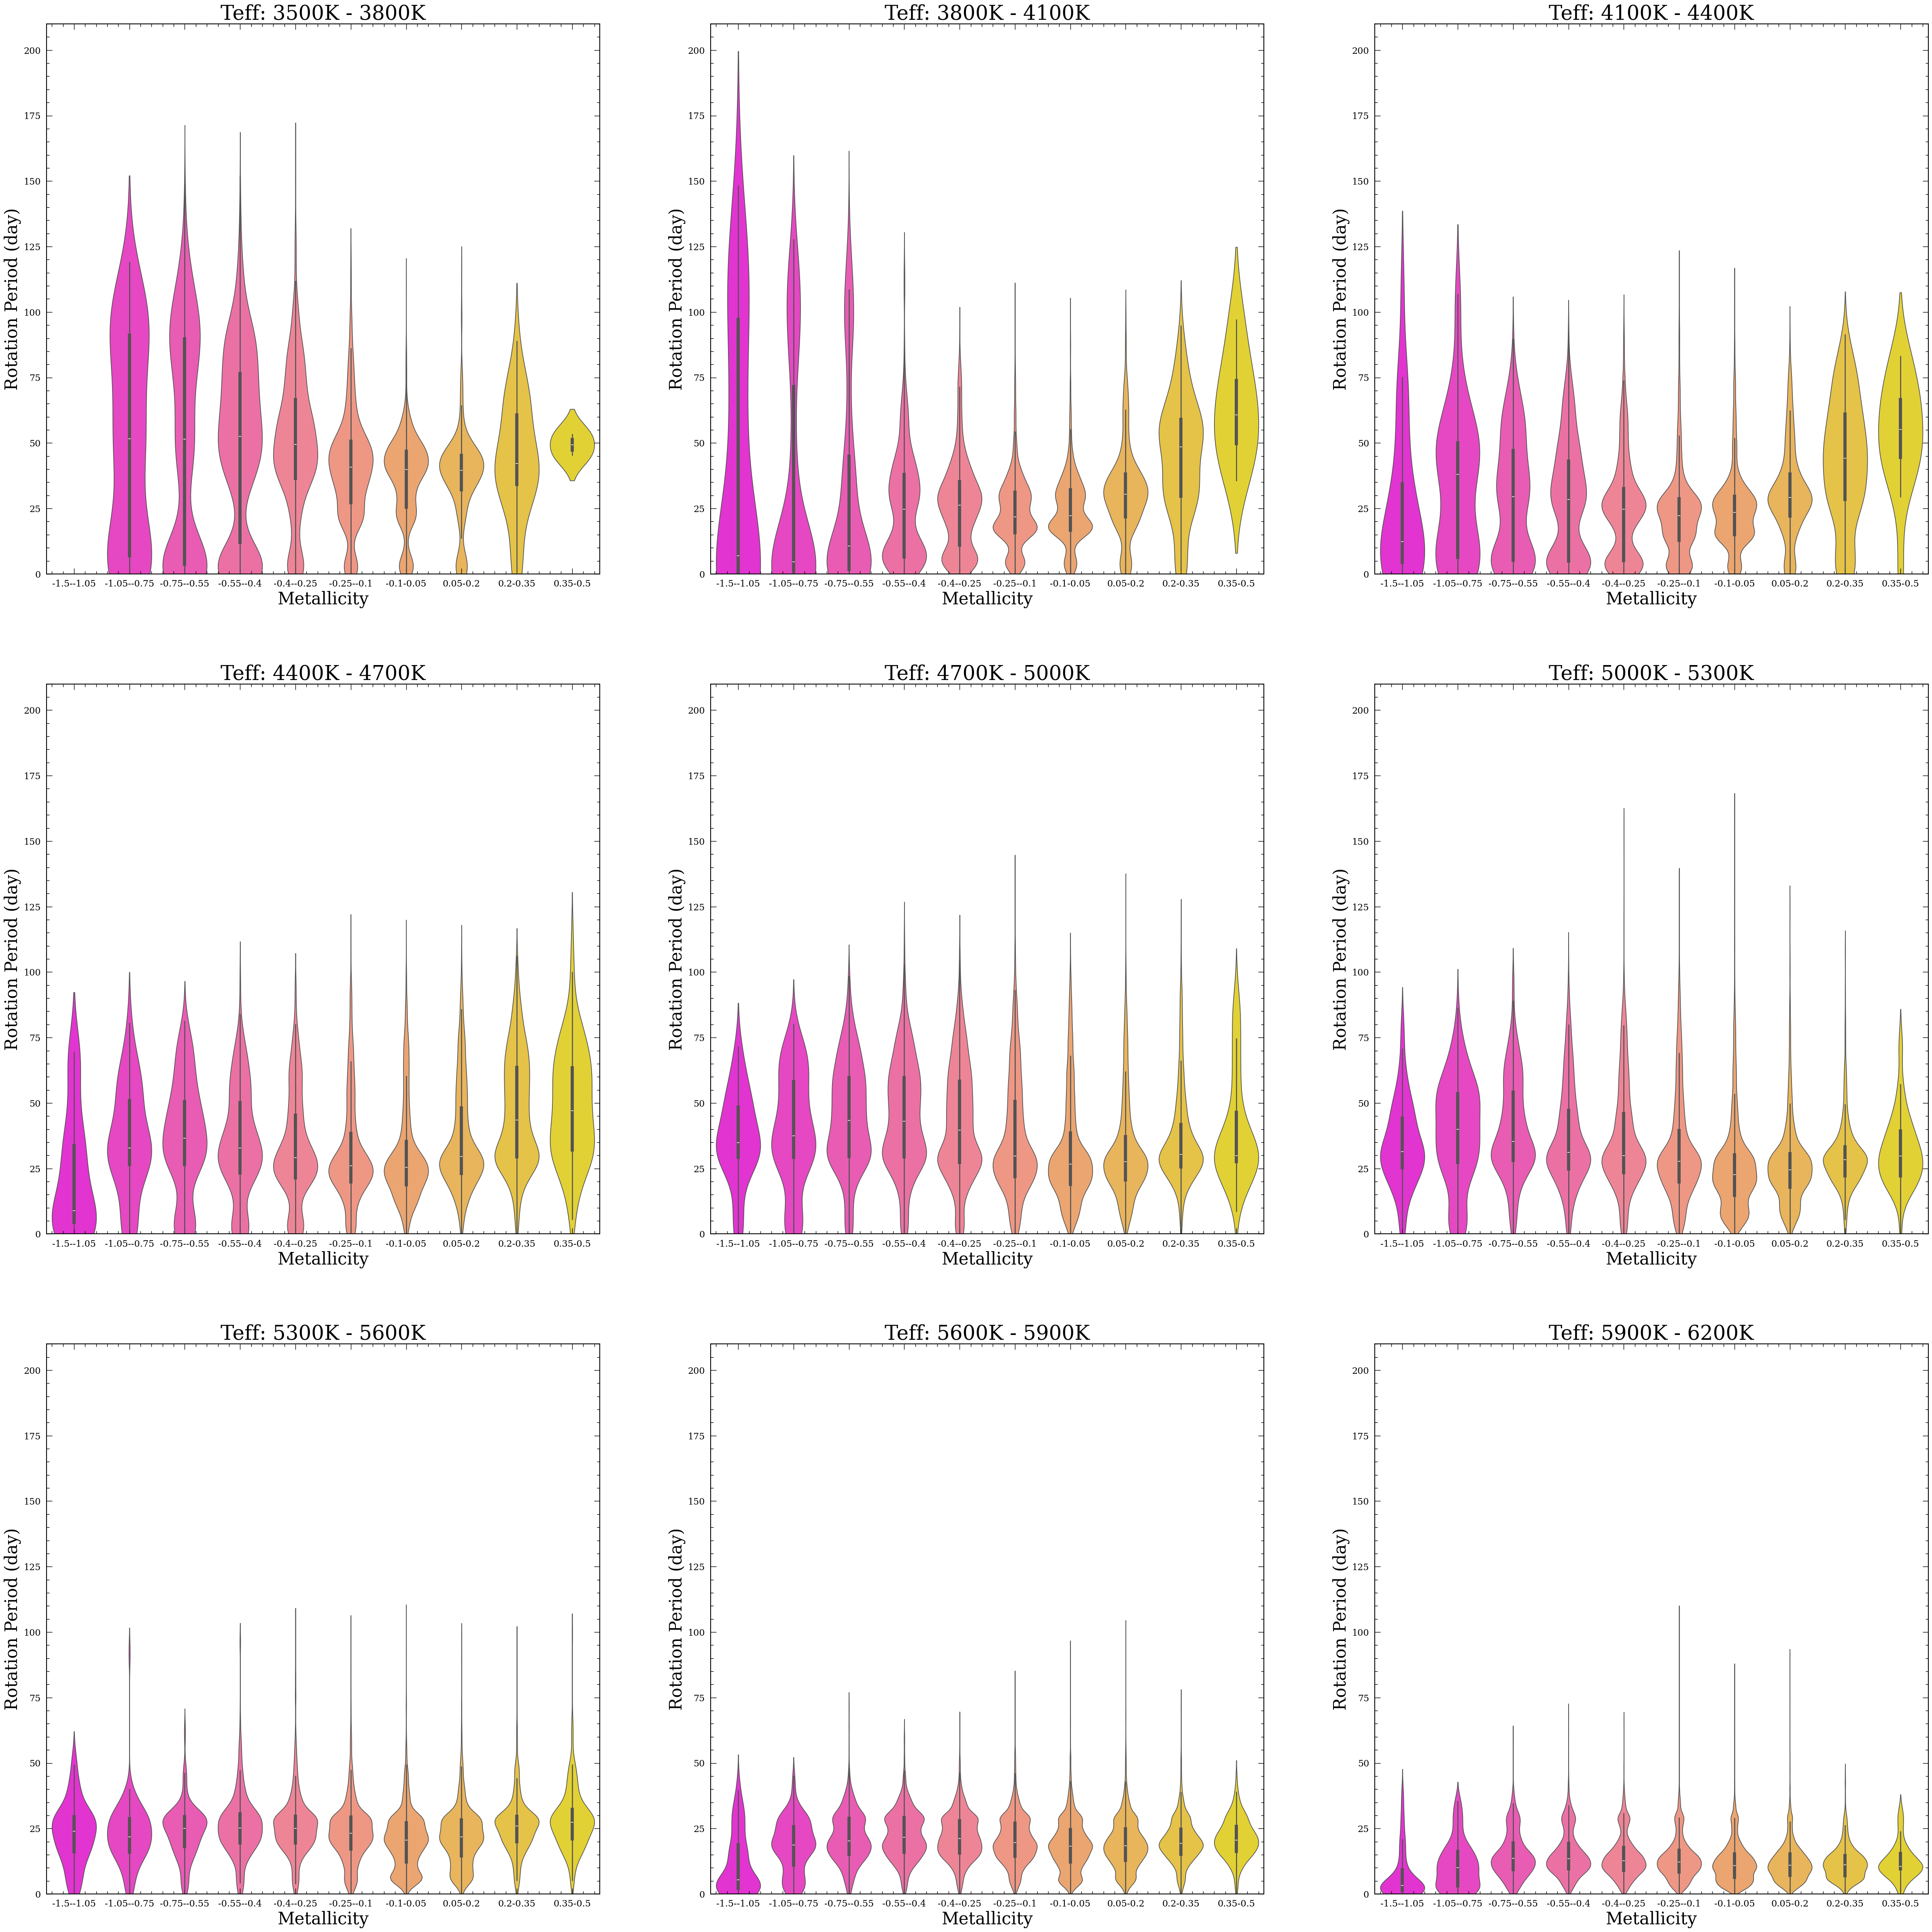

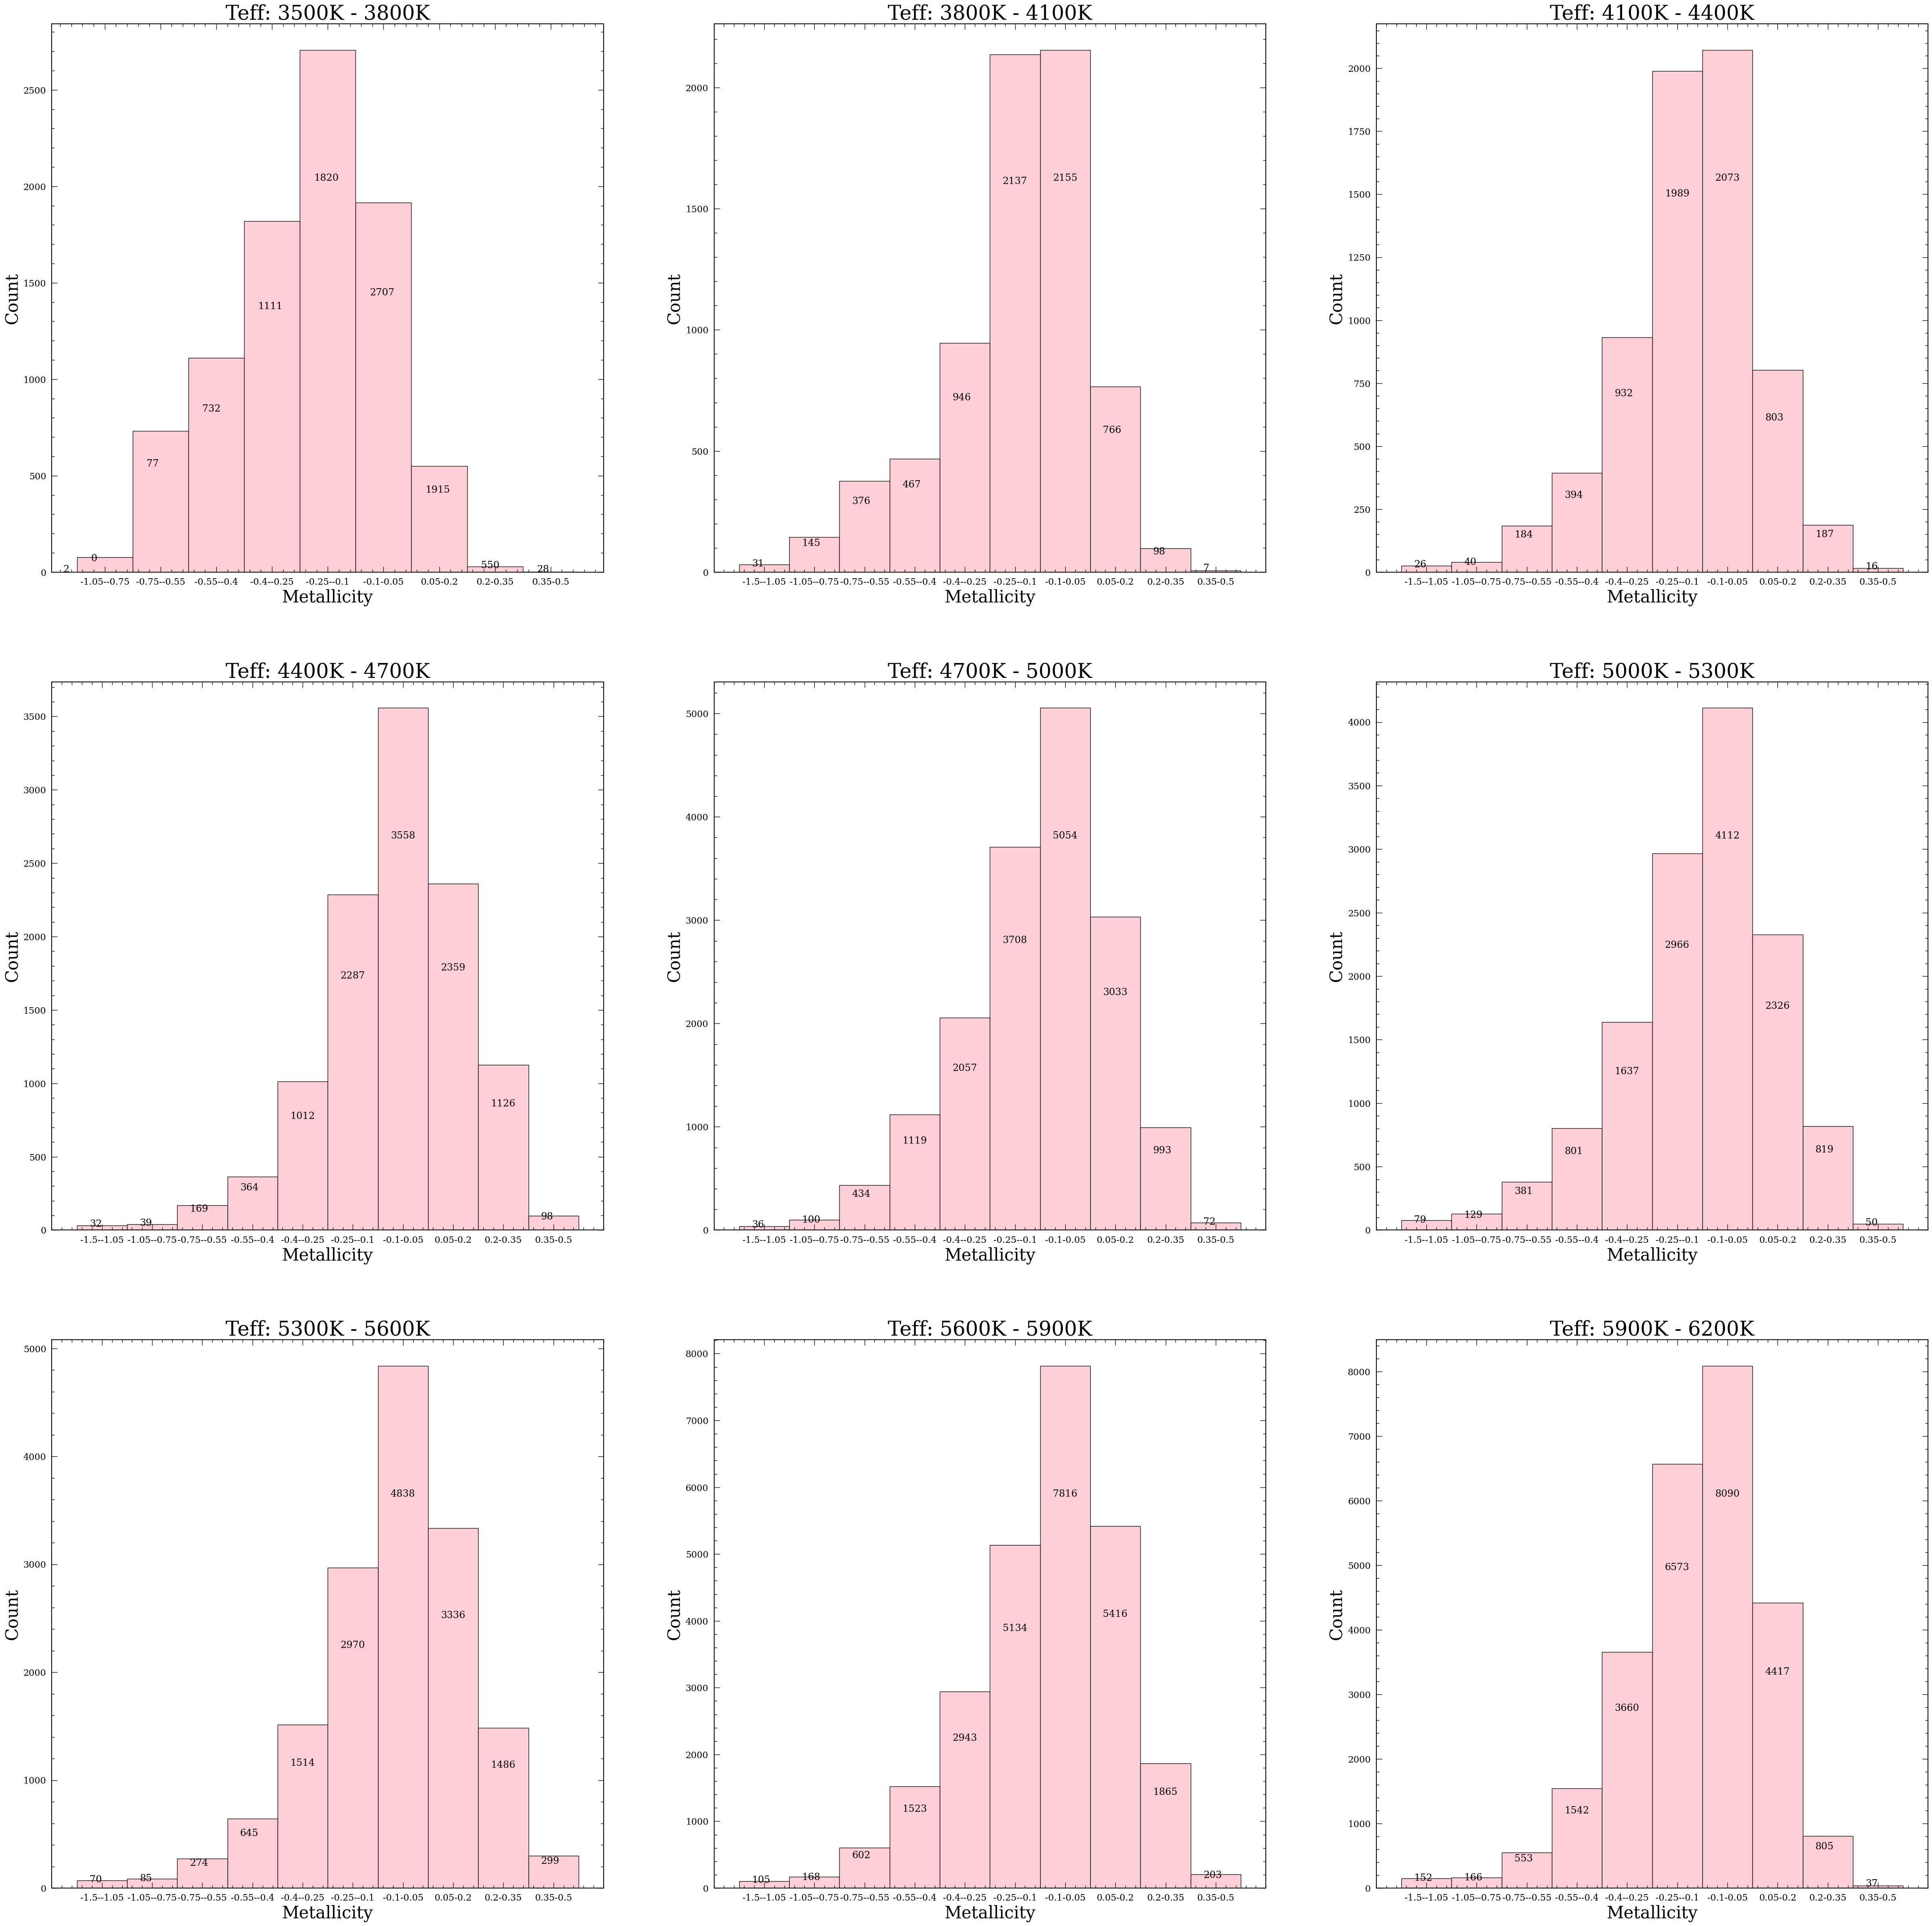

In [1]:
import plotting
import datamanip
import warnings
warnings.filterwarnings('ignore')
import matplotlib

plotting.plotparams()

# general parameters
csv = 'tempcsv/prot_kinematic_xgboost.csv'
y = 'Prot'
mh = 'mh_xgboost'
mhbins = (-1.5, -1.05, -0.75, -0.55, -0.40, -0.25, -0.10, 0.05, 0.20, 0.35, 0.5)
mhbinlabels = [f'{mhbins[i]}-{mhbins[i+1]}' for i in range(len(mhbins) - 1)]
palette = 'spring'
figsize=(60,60)

# graph specific parameters
x = 'teff_xgboost'
teffbins = tuple(range(3500, 6201, 300))
teffbinlabels = [f'{teffbins[i]}-{teffbins[i+1]}' for i in range(len(teffbins) - 1)]
title = 'Low-Mass Stars binned by Metallicity'

df = datamanip.readcsv(csv, hue=mh, huebin=mhbins, huebinlabel=mhbinlabels)

vfig, vax = plotting.plt.subplots(nrows=3, ncols=3, figsize=figsize)
hfig, hax = plotting.plt.subplots(nrows=3, ncols=3, figsize=figsize)
for i in range(3):
    for j in range(3):
        sample = df[df[x] > teffbins[3*i + j]]
        sample = sample[sample[x] < teffbins[3*i + j + 1]]

        plotting.sns.histplot(sample, x=mh, bins=mhbins, ax=hax[i,j], color='pink')
        hax[i,j].set_title(f'Teff: {teffbins[3*i + j]}K - {teffbins[3*i + j + 1]}K', fontsize=36)
        hax[i,j].set_xlabel('Metallicity')
        hax[i,j].tick_params(labelsize=16)
        bins = sample.groupby(by=mh).size().reset_index(name='counts')
        plotting.addhistcounts(hax[i,j], bins['counts'], size='xx-large', color='k')

        plotting.sns.violinplot(sample, y='Prot', x=mh, ax=vax[i,j], palette=palette, inner='box')
        vax[i,j].set_title(f'Teff: {teffbins[3*i + j]}K - {teffbins[3*i + j + 1]}K', fontsize=36)
        vax[i,j].set_xlabel('Metallicity')
        vax[i,j].set_ylim(0, 210)
        vax[i,j].tick_params(labelsize=16)
        vax[i,j].set_ylabel('Rotation Period (day)')

vfig.show()
vfig.savefig('plots/histograms/violinplots.png')
hfig.show()
hfig.savefig('plots/histograms/counts.png')


# Rescale Periods per Metallicity Bin Per Teff Bin

[[5 5 5 ... 3222.802988116626 3222.802988116626 '-0.75--0.55']
 [41 41 41 ... 3161.614504673027 3161.614504673027 '-1.05--0.75']
 [72 72 72 ... 3658.854026276928 3658.854026276928 '0.05-0.2']
 ...
 [152427 152427 152427 ... 3153.4200646909103 3153.4200646909103
  '-0.75--0.55']
 [152428 152428 152428 ... 3342.9686881899106 3342.9686881899106
  '-0.4--0.25']
 [152435 152435 152435 ... 3457.980986318952 3457.980986318952
  '-0.25--0.1']]
[]
[['-0.1-0.05' 1915 17.065 36.168]]
[[5 5 5 ... 3222.802988116626 3222.802988116626 '-0.75--0.55']
 [41 41 41 ... 3161.614504673027 3161.614504673027 '-1.05--0.75']
 [72 72 72 ... 3658.854026276928 3658.854026276928 '0.05-0.2']
 ...
 [152427 152427 152427 ... 3153.4200646909103 3153.4200646909103
  '-0.75--0.55']
 [152428 152428 152428 ... 3342.9686881899106 3342.9686881899106
  '-0.4--0.25']
 [152435 152435 152435 ... 3457.980986318952 3457.980986318952
  '-0.25--0.1']]
[['-1.05--0.75' 77 28.266 50.944]]
[['-0.1-0.05' 1915 17.065 36.168]]
[[5 5 5 ... 

KeyError: '-0.75--0.55'

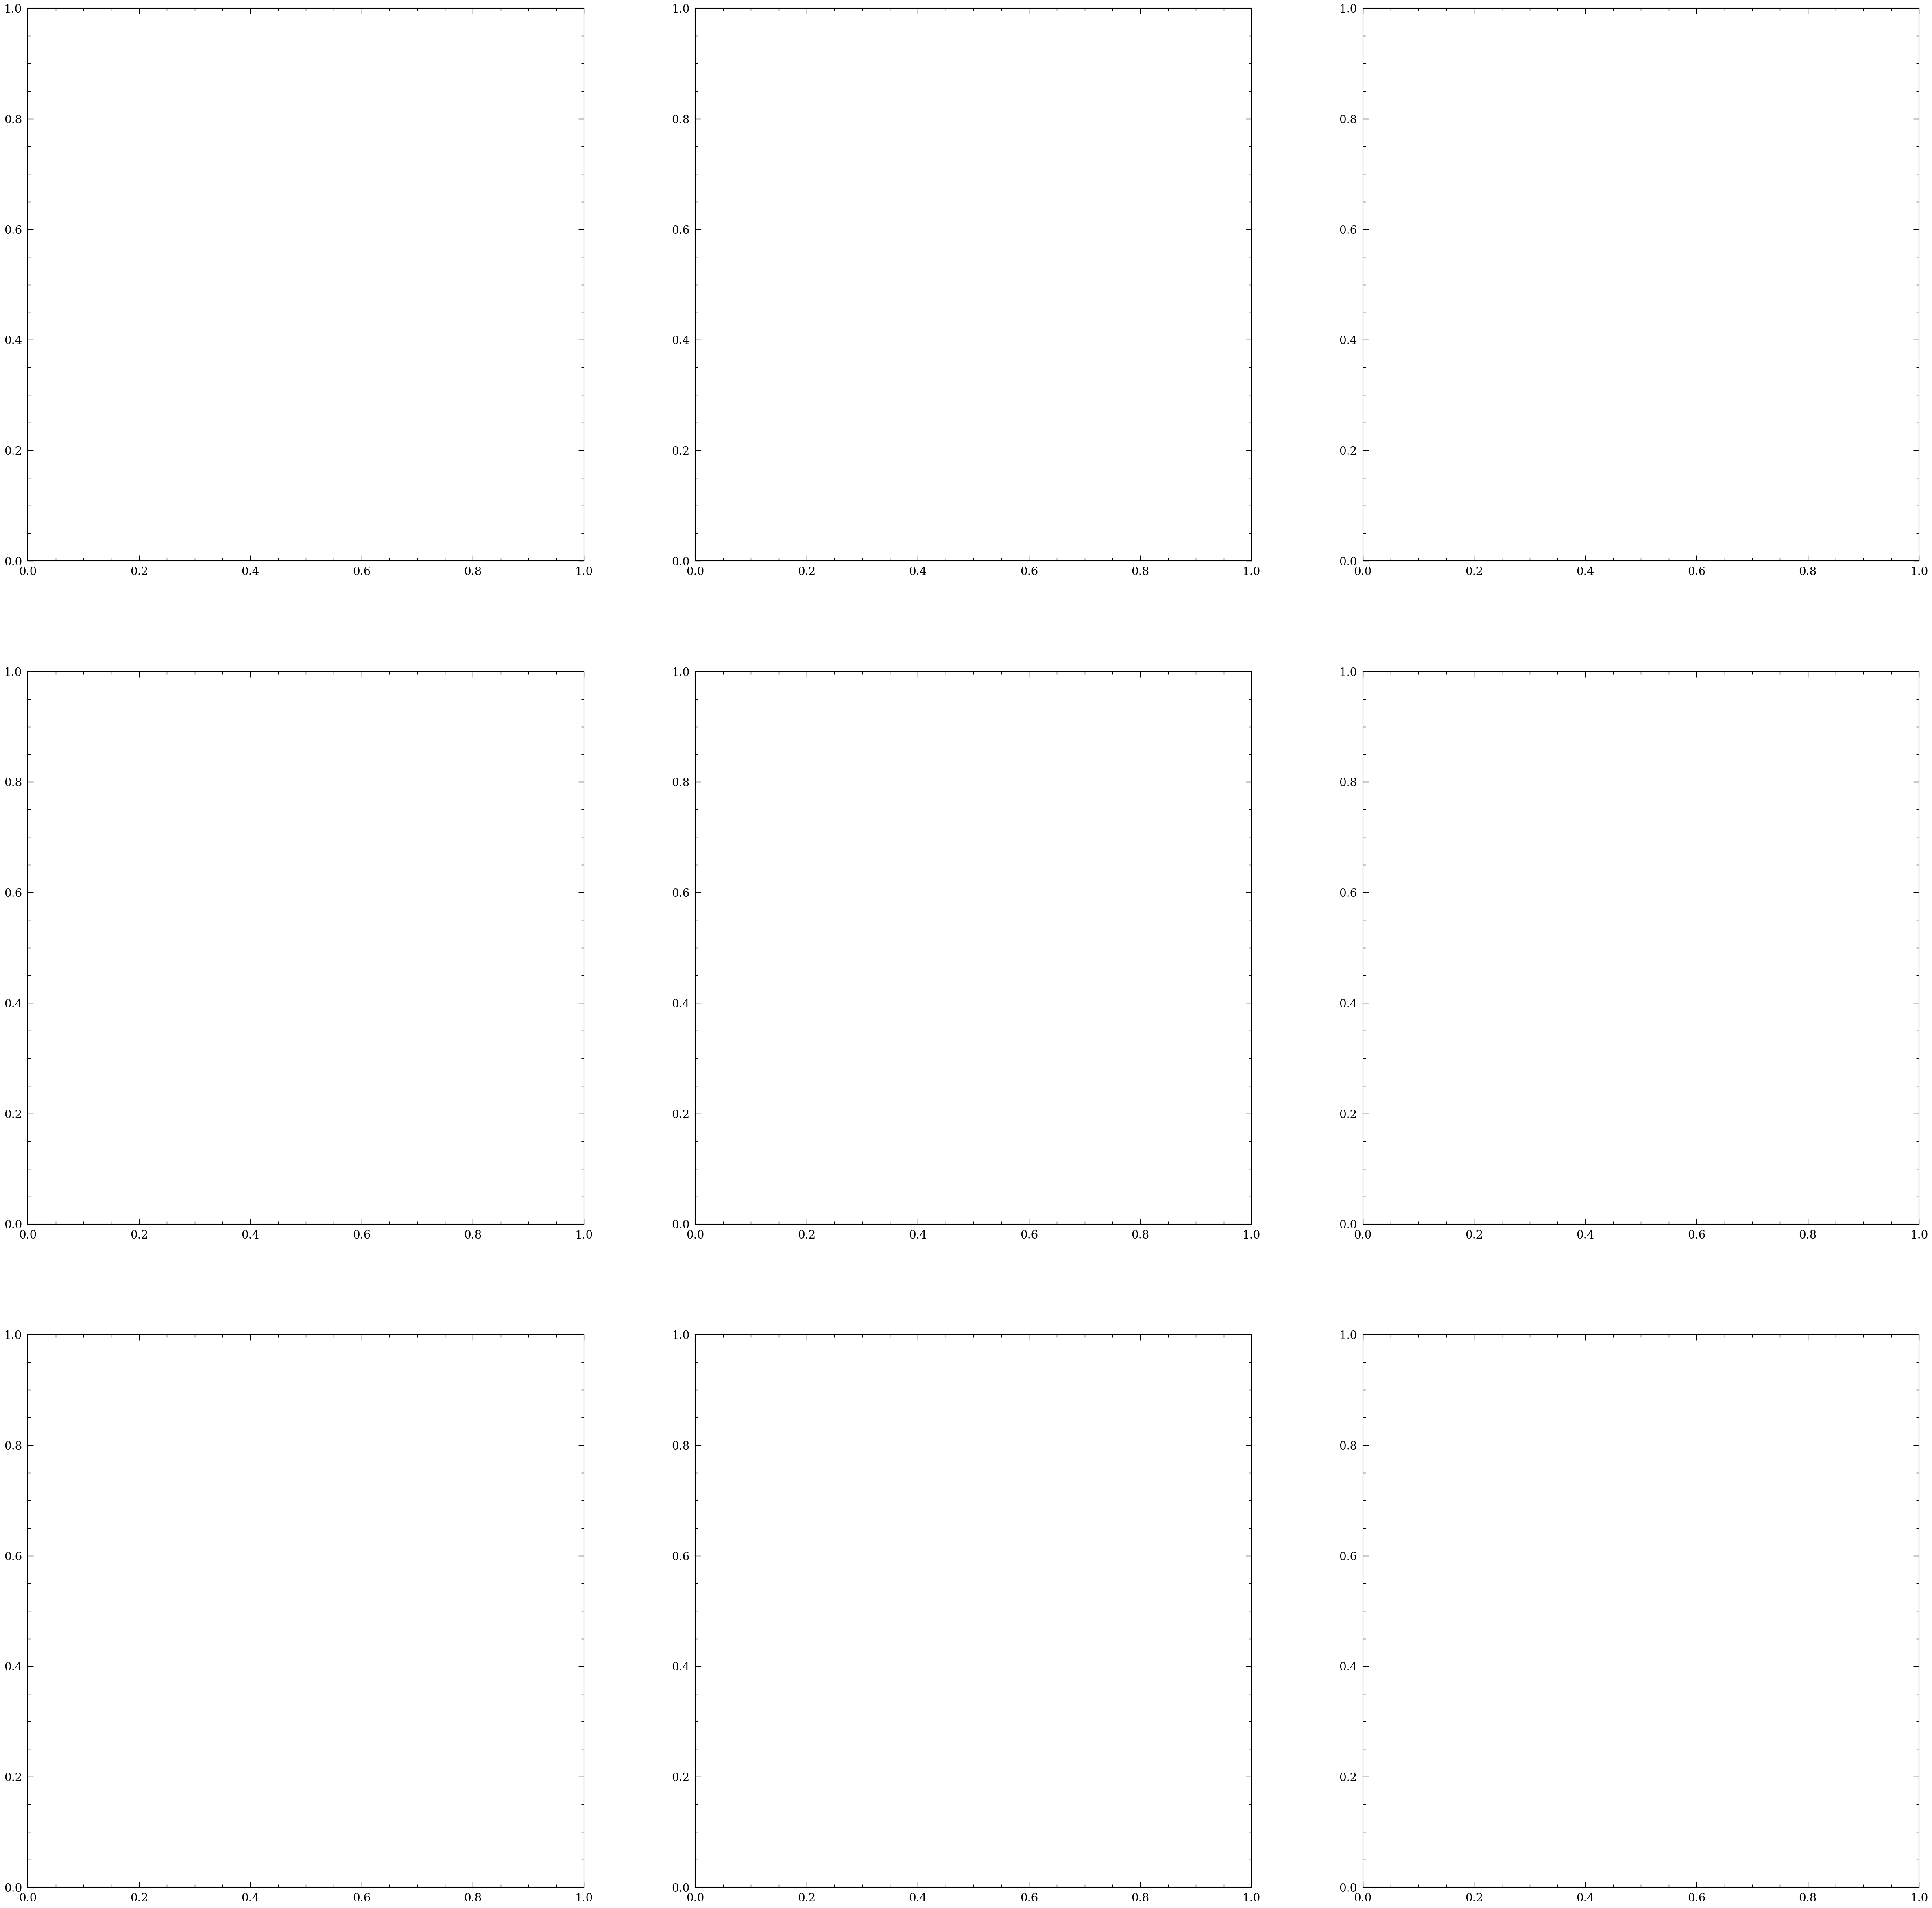

In [16]:
refmhbin = '-0.1-0.05'

vfig, vax = plotting.plt.subplots(nrows=3, ncols=3, figsize=figsize)

for i in range(3):
    for j in range(3):
        sample = df[(df[x] > teffbins[3*i + j])]
        sample = sample[sample[x] < teffbins[3*i + j + 1]]
        vzdisps = datamanip.calcvzdisp(sample, mhbinlabels, x)
        rescales = {}

        for mhbin in mhbinlabels:
            one = vzdisps[vzdisps[mh] == mhbin]
            two = vzdisps[vzdisps[mh] == refmhbin]

            #rescale = round(float(two['vzdisp'].values[2] / one['vzdisp'].values[2]), 3)
            #rescales[mhbin] = rescale
            print(sample.values)
            print(one.values)
            print(two.values)

        for i, mhvalue in sample['mh_xgboost'].items():
            sample['Prot'][i] *= rescales[mhvalue]

        print(sample)

        plotting.sns.violinplot(data=sample, x=mh, y=y, ax=vax[i,j], palette=palette, inner='quart', axis=1)
        vax[i,j].set_title(f'Teff: {teffbins[3*i + j]}K - {teffbins[3*i + j + 1]}K', fontsize=36)
        vax[i,j].set_xlabel('Metallicity')
        vax[i,j].tick_params(labelsize=16)
        vax[i,j].set_ylabel('Rotation Period (day)')

vfig.show()
hfig.show()